### 1. Perform Exploratory data analysis. (20)
#### ○ What can you conclude from methods of central tendency and deviation of the variables?
#### ○ Are there any correlated variables?
#### ○ Interpret the skewness of the variables.

In [161]:
import pandas as pd 
import numpy as np
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Year             305 non-null    int64
 2   Auxillary nodes  305 non-null    int64
 3   Survival         305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [163]:
# Summary Statistics
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### 1.1 Following are the conclusions from central tendency and deviation.

####   Average values for Age and Year are higher than other two variables. Normalization/standardization may be required based on performance of machine learning model.

#### Standard deviation is high for Age and Auxillary nodes hence values of these variables are widely distributed from mean compared to other two variables. 


<IPython.core.display.Javascript object>


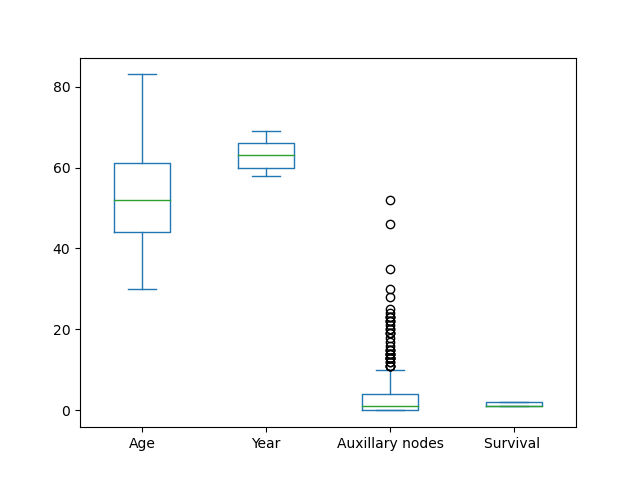

<AxesSubplot:>

In [164]:
# Box plot
%matplotlib notebook
data.plot.box()

### . 1.1 
### A box and whisker plot reveals that the Auxillary nodes variable has outliers. Since we don't have clarity about "Auxillary nodes" parameters it is decided to not to remove outliers from data set. 


In [165]:
# Correlation
corr=data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


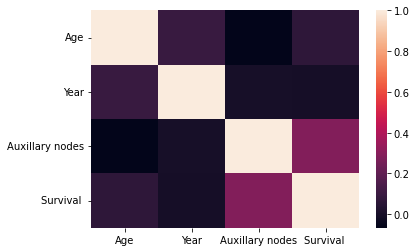

In [166]:
# Visualization - correlation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr)
plt.show()


### 1.2 The heat map indicate that there are no significantly correlated variables in the given data set.


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

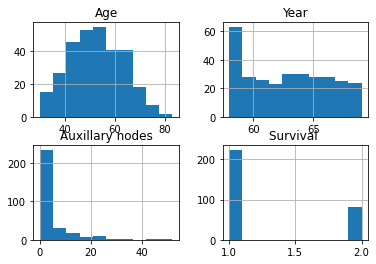

In [167]:
data.hist()

### 1.3. Based on above histograms, positive skewness is observed in Auxilary nodes and Year.
### To correct skewness 
### Reciprocal Transformation is used for the parameter Year. 
### Square Root Transformation is used for the parameter Auxillary nodes.


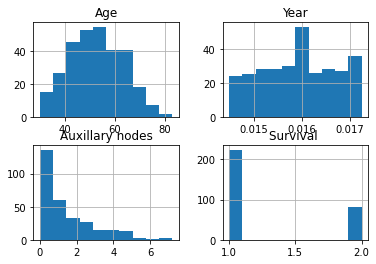

In [168]:
final_data=data
final_data["Auxillary nodes"]=final_data["Auxillary nodes"]**0.5
final_data["Year"]=1/final_data["Year"]
final_data.hist()
# Save to .csv
final_data.to_csv("final_data.csv")


In [169]:
# Standardization and Normalization - Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(final_data)
scaled = scaler.fit_transform(final_data)
scaled_std_data = pd.DataFrame(scaled, columns=final_data.columns)

# Save to .csv
scaled_std_data.to_csv("scaled_std_data.csv")

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(final_data)
scaled = scaler.fit_transform(final_data)
scaled_mm_data = pd.DataFrame(scaled, columns=final_data.columns)

# Save to .csv
scaled_mm_data.to_csv("scaled_mm_data.csv")

scaled_mm_data


,Age,Year,Auxillary nodes,Survival
0,0.000000,0.595308,0.240192,0.0
1,0.000000,0.324476,0.000000,0.0
2,0.018868,0.893683,0.196116,0.0
3,0.018868,0.324476,0.277350,0.0
4,0.056604,1.000000,0.438529,0.0
...,...,...,...,...
300,0.849057,0.595308,0.138675,0.0
301,0.867925,0.157395,0.000000,0.0
302,0.886792,0.324476,0.240192,0.0
303,0.905660,0.324476,0.138675,1.0


## 2. Develop Supervised learning models. (50)
### ○ Logistic Regression
### ○ Random Forest
### ○ Support Vector Machine
### ○ Neural Network
## Compare the 4 methods based on the performance metrics and identify the best model for this problem.
### - Use 10 - fold cross validation.
### - Use GridSearchCV for searching through hyper parameters.

In [170]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Import data

data = pd.read_csv("scaled_mm_data.csv",index_col=0)

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.595308,0.240192,0.0
1,0.000000,0.324476,0.000000,0.0
2,0.018868,0.893683,0.196116,0.0
3,0.018868,0.324476,0.277350,0.0
4,0.056604,1.000000,0.438529,0.0
...,...,...,...,...
300,0.849057,0.595308,0.138675,0.0
301,0.867925,0.157395,0.000000,0.0
302,0.886792,0.324476,0.240192,0.0
303,0.905660,0.324476,0.138675,1.0


### Logistic Regression

#### Hyperparameters to tune:
- solver: [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
- penalty: [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
- C: [100, 10, 1.0, 0.1, 0.01]

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        97
         1.0       0.42      0.32      0.36        25

    accuracy                           0.77       122
   macro avg       0.63      0.60      0.61       122
weighted avg       0.75      0.77      0.76       122



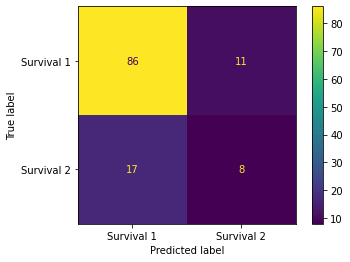

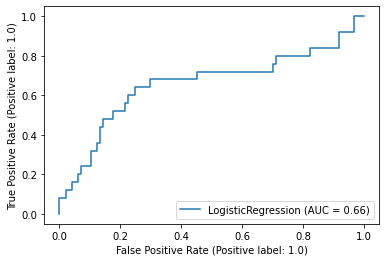

In [171]:
# Logistic Regression


# Defining and training the model
clf = LogisticRegression(solver = "sag", penalty = "l2", C = 100, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["Survival 1", "Survival 2"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()


#parameters = {'solver':("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 'penalty':("none", "l1", "l2", "elasticnet"),'C':[100, 10, 1.0, 0.1, 0.01]}
#lg_grid = GridSearchCV(clf, parameters)
#lg_grid.fit(X_train, y_train)
#lg_grid.best_params_

### Random forest

#### Hyperparameters to tune:
- max_features: [‘sqrt’, ‘log2’]
- n_estimators: [10, 100, 1000]
- max_depth

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        97
         1.0       0.54      0.28      0.37        25

    accuracy                           0.80       122
   macro avg       0.69      0.61      0.63       122
weighted avg       0.77      0.80      0.78       122



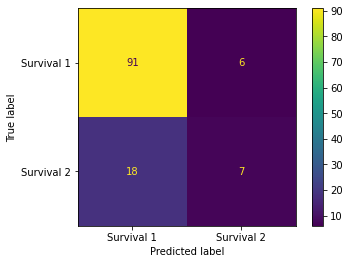

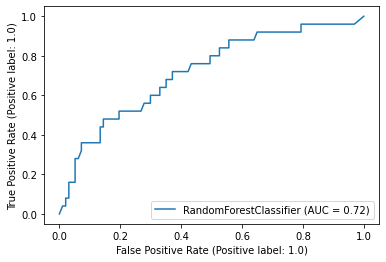

In [172]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 10).fit(X_train, y_train)

# Evaluating the model 
rf.score(X_test, y_test)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

plot_roc_curve(rf, X_test, y_test) 
plt.show()

#parameters = {'max_features':("sqrt", "log2"), 'n_estimators':[10, 100, 1000]}
#rf_grid = GridSearchCV(rf, parameters)
#rf_grid.fit(X_train, y_train)
#rf_grid.best_params_

### Support Vector Machine

#### Hyperparameters to tune
- kernels: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
- C: [100, 10, 1.0, 0.1, 0.001]
- gamma: [100, 10, 1.0, 0.1]

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        97
         1.0       0.62      0.20      0.30        25

    accuracy                           0.81       122
   macro avg       0.72      0.58      0.60       122
weighted avg       0.78      0.81      0.77       122



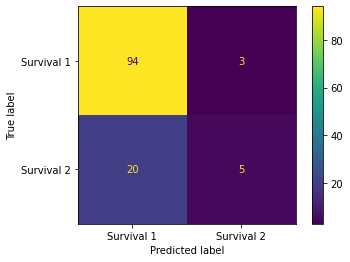

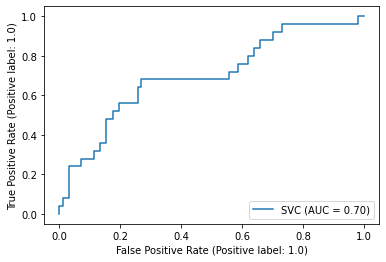

In [173]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 10, kernel = "poly", gamma = 1).fit(X_train, y_train)

# Evaluating the model 
svm.score(X_test, y_test)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

plot_roc_curve(svm, X_test, y_test) 
plt.show()


# Implement grid search for parameter tuning
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1,10]}
#svm_grid = GridSearchCV(svm, parameters)
#svm_grid.fit(X_train, y_train)
#svm_grid.best_params_

### Neural Network

#### Hyperparameters to tune
- hidden_layer_sizes
- solver: [‘lbfgs’, ‘sgd’, ‘adam’]
- learning_rate: [‘constant’, ‘invscaling’, ‘adaptive’]
- learning_rate_init
- activation - [‘identity’, ‘logistic’, ‘tanh’, ‘relu’]

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85        97
         1.0       0.42      0.40      0.41        25

    accuracy                           0.76       122
   macro avg       0.63      0.63      0.63       122
weighted avg       0.76      0.76      0.76       122



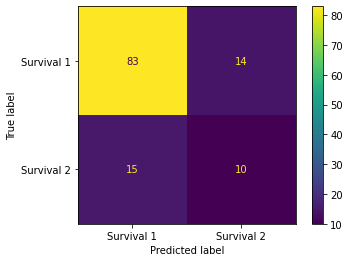

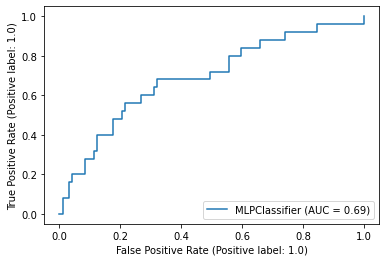

In [174]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

# Evaluating the model 
nn.score(X_test, y_test)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

plot_roc_curve(nn, X_test, y_test) 
plt.show()

# Implement grid search for parameter tuning
#parameters = {'solver':(‘lbfgs’, ‘sgd’, ‘adam’), 'activation':(‘identity’, ‘logistic’, ‘tanh’, ‘relu’)}
#svm_grid = GridSearchCV(svm, parameters)
#svm_grid.fit(X_train, y_train)
#svm_grid.best_params_

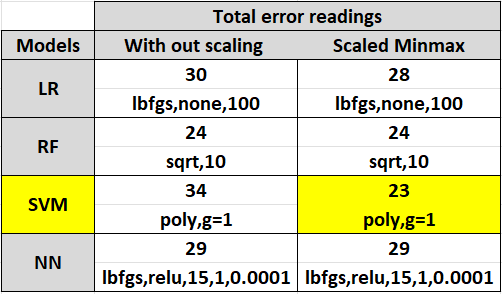

## 2. supervised learning models are developed above and performance matrix and roc curve are plotted for all models. 
### Optimum parameters for all models are achieved by using grid search.
### Data with minmax scaling has better performance for all models compared to data without scaling. 
### In this case minimum number of error values are considered for evaluating the performance.
### Based on performance matics also weighted averages are highest for Support Vector Machine model. Hence SVM model with minmax scaled data is best model for this data.


## Following are 10-fold cross validations

	

In [175]:
kf = KFold(n_splits=10)

clf_accu = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    clf_accu.append(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avg_clf = sum(clf_accu)/len(clf_accu)

print("\nLogistic regression model training and testing accuracies")

print("\nAverage accuracy for logistic regression model training set is :" + str(Avg_clf))
print("Testing accuracy is "+ str(clf.score(X_test, y_test)))



Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7777777777777778
Accuracy for iteration 5 is 0.7222222222222222
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.8333333333333334
Accuracy for iteration 9 is 0.7222222222222222
Accuracy for iteration 10 is 0.7222222222222222

Logistic regression model training and testing accuracies

Average accuracy for logistic regression model training set is :0.7599415204678361
Testing accuracy is 0.7786885245901639


In [176]:
kf = KFold(n_splits=10)

rf_accu = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    rf_accu.append(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avg_rf = sum(rf_accu)/len(rf_accu)

print("\nRandom forest model training and testing accuracies")

print("\nAverage accuracy for logistic regression model training set is :" + str(Avg_rf))
print("Testing accuracy is "+ str(rf.score(X_test, y_test)))



Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.6842105263157895
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6111111111111112
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.6111111111111112
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7777777777777778

Random forest model training and testing accuracies

Average accuracy for logistic regression model training set is :0.6944444444444444
Testing accuracy is 0.7786885245901639


In [177]:
kf = KFold(n_splits=10)

svm_accu = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    svm_accu.append(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avg_svm = sum(svm_accu)/len(svm_accu)

print("\nSupport Vector machine model training and testing accuracies")

print("\nAverage accuracy for logistic regression model training set is :" + str(Avg_svm))
print("Testing accuracy is "+ str(svm.score(X_test, y_test)))

Accuracy for iteration 1 is 0.631578947368421
Accuracy for iteration 2 is 0.7368421052631579
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6111111111111112
Accuracy for iteration 10 is 0.6666666666666666

Support Vector machine model training and testing accuracies

Average accuracy for logistic regression model training set is :0.6944444444444444
Testing accuracy is 0.8032786885245902


In [178]:
kf = KFold(n_splits=10)

nn_accu = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    nn_accu.append(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1

Avg_nn = sum(nn_accu)/len(nn_accu)

print("\nNeural network model training and testing accuracies")

print("\nAverage accuracy for logistic regression model training set is :" + str(Avg_nn))
print("Testing accuracy is "+ str(nn.score(X_test, y_test)))

C:\Users\143ra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\143ra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\143ra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Accuracy for iteration 1 is 0.631578947368421
Accuracy for iteration 2 is 0.7368421052631579
Accuracy for iteration 3 is 0.5789473684210527
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6111111111111112
Accuracy for iteration 6 is 0.7777777777777778
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.6666666666666666
Accuracy for iteration 9 is 0.7777777777777778
Accuracy for iteration 10 is 0.6666666666666666

Neural network model training and testing accuracies

Average accuracy for logistic regression model training set is :0.6891812865497077
Testing accuracy is 0.7786885245901639


C:\Users\143ra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 3. Evaluation for over fitting
### i) For Logistic regression model:
###    Training accuracy (76%) and testing accuracy(78%) are almost same. Hence these is no over fitting nor under fitting. 
### ii) For Random forest model:
###    Training accuracy(69%) is less than testing accuracy 77.8%) and testing accuracy is also not bad. Hence these is no over fitting nor under fitting. 
### iii) For Support Vector machine model:
###    Training accuracy(69.4%) is less than testing accuracy (80.3%) and testing accuracy is also not bad. Hence these is no over fitting nor under fitting. 
### iii) For Neural network model:
###    Training accuracy(68.9%) is less than testing accuracy (77.8%) and testing accuracy is also not bad. Hence these is no over fitting nor under fitting. 

## 4. Develop a function which can implement machine learning. (20)

Please enter file name as cancer.csv
Enter your csv file name: cancer.csv
Enter your algorithm choice: 
1 for LR 
2 for RFC 
3 for SVM 
4 for NN :3


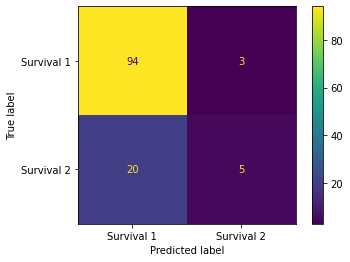

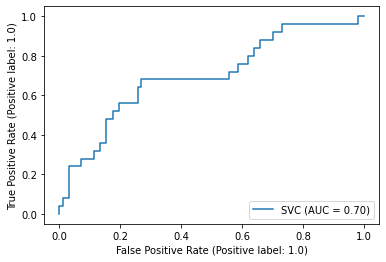

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        97
         1.0       0.62      0.20      0.30        25

    accuracy                           0.81       122
   macro avg       0.72      0.58      0.60       122
weighted avg       0.78      0.81      0.77       122



In [179]:
def machine_learning(data, algorithm):
    
    # Import libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    # Scikit learn - machine learning algorithms and methods
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
    
    
    final_data = pd.read_csv(data)
    #print(final_data)
       
    final_data["Auxillary nodes"] = final_data["Auxillary nodes"]**(0.5)
    final_data["Year"] = 1/final_data["Year"]
    
    # Transformation
    scaler = MinMaxScaler()
    scaler.fit(final_data)
    scaled =scaler.fit_transform(final_data)
    scaled_mm_data = pd.DataFrame(scaled, columns = final_data.columns)
    
    X = scaled_mm_data.iloc[:, :-1]
    #print(X)
    y = scaled_mm_data.iloc[:, -1]
    #print(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 10, train_size = 0.6)
        
    if algorithm == "1":
        clf = LogisticRegression(solver = "sag", penalty = "l2", C = 100, random_state = 10).fit(X_train, y_train)
    elif algorithm == "2":
        clf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 10).fit(X_train, y_train)
    elif algorithm == "3":
        clf = SVC(random_state = 10, kernel = "poly", gamma = 1).fit(X_train, y_train)
    elif algorithm == "4":
        clf = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    else:
        print("Wrong input please try again")
                
    # Evaluating the model 
    clf.score(X_test, y_test)

    # Making predictions
    y_pred = clf.predict(X_test)
    
    labels = ["Survival 1", "Survival 2"]

    # Developing the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot()

    # Print performance metrics 
    performance_metrics = classification_report(y_test, y_pred, labels = clf.classes_)

    # Plotting ROC curve
    plot_roc_curve(clf, X_test, y_test) 
    plt.show()
    
    return print(performance_metrics)
        

print("Please enter file name as cancer.csv")
data = input("Enter your csv file name: ")
algorithm = input("Enter your algorithm choice: \n1 for LR \n2 for RFC \n3 for SVM \n4 for NN :")

machine_learning(data, algorithm)

## 4. Above is the program with function which can implement machine learning.